In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1º TRIMESTRE 2018 y 2019

In [2]:
# Cargar los dataset dataset
Q12018 = pd.read_csv('SUSQ118CLEAN.csv')
Q12019 = pd.read_csv('SUSQ119CLEAN.csv')
# Fusionar los datasets por columnas comunes
Q1 = pd.concat([Q12018, Q12019])

In [3]:
Q1.head()

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,323.0,Damen Ave & Pierce Ave,Claremont Ave & Hirsch St,Subscriber,Male,1,1,2018,30-50
1,377.0,Winthrop Ave & Lawrence Ave,Clark St & Winnemac Ave (Temp),Subscriber,Male,1,1,2018,30-50
2,2904.0,LaSalle St & Washington St,Troy St & North Ave,Subscriber,Male,1,1,2018,30-50
3,747.0,Rush St & Hubbard St,Larrabee St & Oak St,Subscriber,Male,1,1,2018,30-50
4,183.0,Blue Island Ave & 18th St,Paulina St & 18th St,Subscriber,Male,1,1,2018,30-50


In [4]:
Q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694561 entries, 0 to 336350
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tripduration       694561 non-null  float64
 1   from_station_name  694561 non-null  object 
 2   to_station_name    694561 non-null  object 
 3   usertype           694561 non-null  object 
 4   gender             694561 non-null  object 
 5   start_day          694561 non-null  int64  
 6   start_month        694561 non-null  int64  
 7   start_year         694561 non-null  int64  
 8   Age_range          694561 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 53.0+ MB


In [5]:
Q1.shape

(694561, 9)

In [6]:
# Desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
Q1.describe()

,tripduration,start_day,start_month,start_year
count,694561.00,694561.00,694561.00,694561.00
mean,628.57,16.30,2.15,2018.48
std,494.83,8.51,0.84,0.50
min,61.00,1.00,1.00,2018.00
25%,315.00,9.00,1.00,2018.00
50%,494.00,16.00,2.00,2018.00
75%,786.00,24.00,3.00,2019.00
max,12502.00,31.00,3.00,2019.00


Trabajo con la edad

In [7]:
# Calcular la suma de cada rango de edad
rang_anoS = Q1.groupby(['Age_range','start_year']).size().reset_index(name='count')
rang_anoS

,Age_range,start_year,count
0,18-29,2018,85149
1,18-29,2019,94575
2,30-50,2018,218746
3,30-50,2019,194046
4,50-65,2018,54315
5,50-65,2019,47730


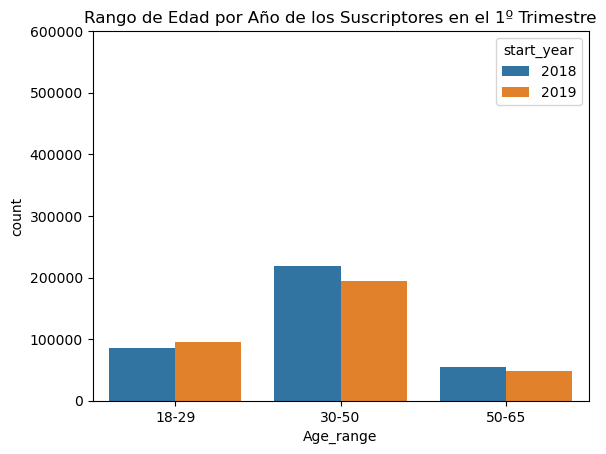

In [8]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='start_year', data=rang_anoS)

# Configurar el título del gráfico
plt.title('Rango de Edad por Año de los Suscriptores en el 1º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 600000)

# Mostrar el gráfico
plt.show()

Trabajar con Tripduration

In [9]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
trip = Q1.groupby(['Age_range', 'start_year'])['tripduration'].mean().reset_index(name='mean_tripduration')
trip

,Age_range,start_year,mean_tripduration
0,18-29,2018,598.43
1,18-29,2019,626.93
2,30-50,2018,619.30
3,30-50,2019,657.48
4,50-65,2018,603.99
5,50-65,2019,638.46


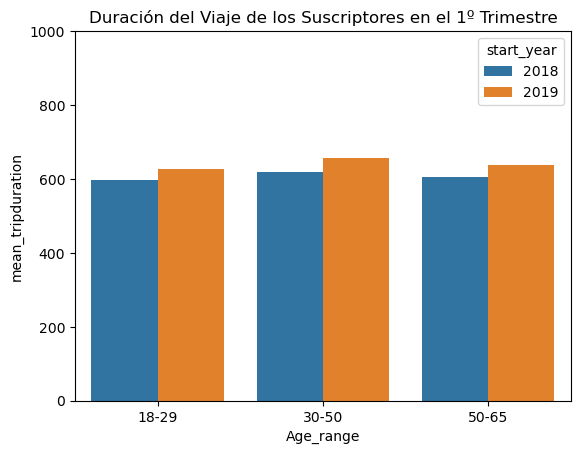

In [10]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='start_year', data=trip)

# Configurar el título del gráfico
plt.title('Duración del Viaje de los Suscriptores en el 1º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 1000)
# Mostrar el gráfico
plt.show()

Trabajar con gender

In [11]:
# Calcular la suma de cada rango de edad
gend_ano = Q1.groupby(['gender','start_year']).size().reset_index(name='count')
gend_ano

,gender,start_year,count
0,Female,2018,70256
1,Female,2019,64330
2,Male,2018,287954
3,Male,2019,272021


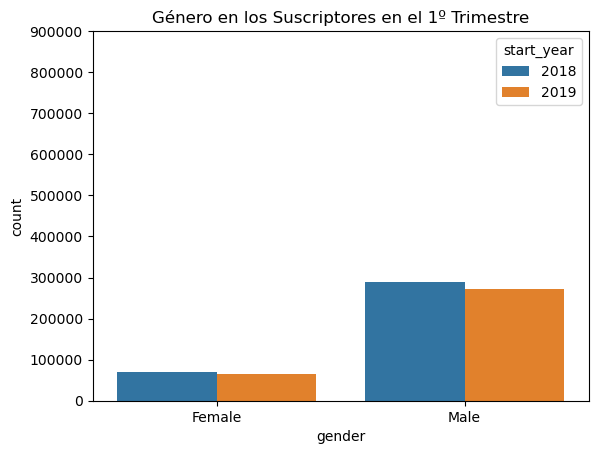

In [12]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='start_year', data=gend_ano)

# Establecer el título del gráfico
plt.title('Género en los Suscriptores en el 1º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 900000)

# Mostrar el gráfico
plt.show()

DIA DE INICIO POR AÑO Y MES

In [13]:
# Calcular la moda de la columna 'star_day' agrupada por 'Start Year' y star_month
moda_por_day = Q1.groupby(['start_year','start_month'])['start_day'].apply(lambda x: x.mode()).reset_index(name='dia_frecuente')
moda_por_day = moda_por_day.drop(columns='level_2')
moda_por_day

,start_year,start_month,dia_frecuente
0,2018,1,26
1,2018,2,27
2,2018,3,28
3,2019,1,8
4,2019,2,14
5,2019,3,28


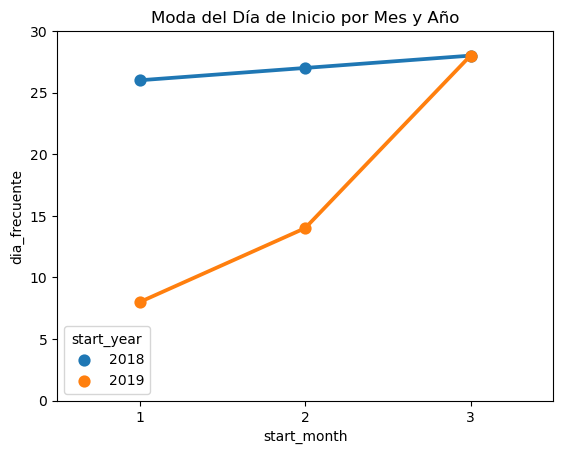

In [14]:
# Crear el gráfico de barras utilizando Seaborn
sns.pointplot(x='start_month', y='dia_frecuente', hue='start_year', data=moda_por_day)

# Configurar el título del gráfico
plt.title('Moda del Día de Inicio por Mes y Año')

# Establecer el rango del eje y desde 0 hasta 30
plt.ylim(0, 30)

# Mostrar el gráfico
plt.show()

ESTACIONES MEJORES DE INICIO Y FINAL

In [15]:
# Contar las repeticiones de valores en la columna 'from_station_name', para saber las mejores estaciones
mejores_estaciones1 = Q1['from_station_name'].value_counts().head(5)
mejores_estaciones1

Clinton St & Washington Blvd    14883
Canal St & Adams St             14317
Clinton St & Madison St         12092
Canal St & Madison St            8848
Kingsbury St & Kinzie St         8742
Name: from_station_name, dtype: int64

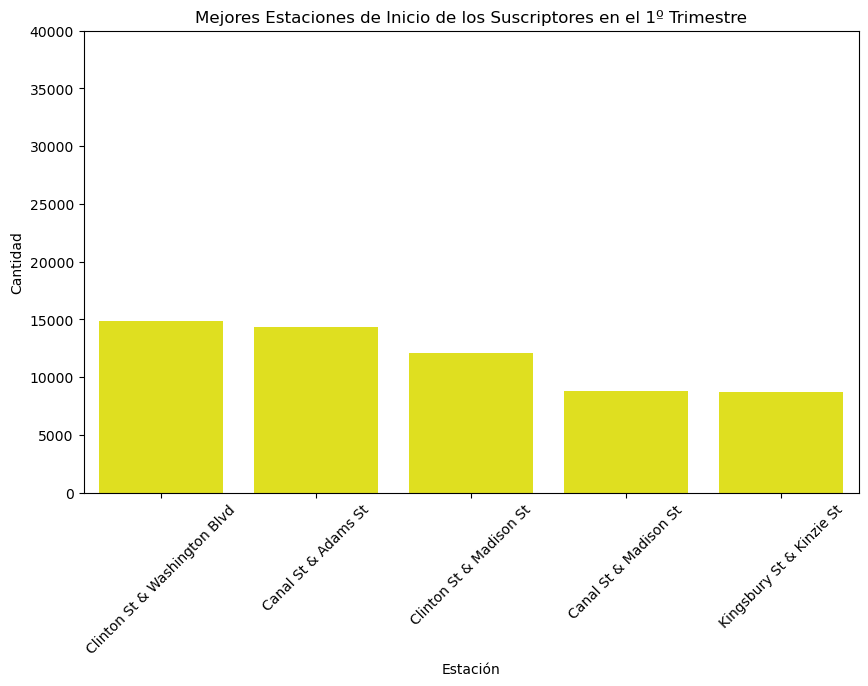

In [16]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones1.index, y=mejores_estaciones1.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Inicio de los Suscriptores en el 1º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [17]:
# Contar las repeticiones de valores en la columna 'to_station_name', para saber las mejores estaciones
mejores_estaciones_final = Q1['to_station_name'].value_counts().head(5)
mejores_estaciones_final

Canal St & Adams St             15337
Clinton St & Washington Blvd    13954
Clinton St & Madison St         13681
Canal St & Madison St            9395
Kingsbury St & Kinzie St         8887
Name: to_station_name, dtype: int64

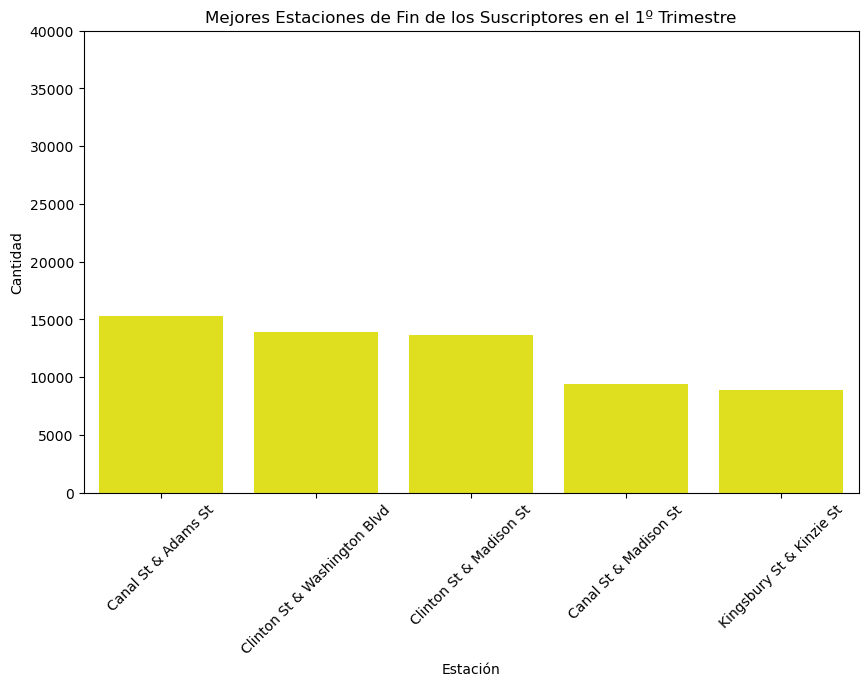

In [18]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones_final.index, y=mejores_estaciones_final.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Fin de los Suscriptores en el 1º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

RELACIONAR ESTACION DE INICIO Y FINAL.

In [19]:
# Encontrar los viajes que coinciden en inicio y fin de recorrido
viajes_coincidentes = Q1[Q1['from_station_name'] == Q1['to_station_name']]
viajes_coincidentes

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
47,1233.00,Field Blvd & South Water St,Field Blvd & South Water St,Subscriber,Male,1,1,2018,50-65
79,1871.00,Damen Ave & Leland Ave,Damen Ave & Leland Ave,Subscriber,Male,1,1,2018,50-65
177,415.00,Damen Ave & Division St,Damen Ave & Division St,Subscriber,Male,1,1,2018,18-29
179,114.00,Leavitt St & North Ave,Leavitt St & North Ave,Subscriber,Male,1,1,2018,30-50
198,6430.00,Clark St & Bryn Mawr Ave,Clark St & Bryn Mawr Ave,Subscriber,Male,1,1,2018,30-50
...,...,...,...,...,...,...,...,...,...
336206,139.00,McClurg Ct & Illinois St,McClurg Ct & Illinois St,Subscriber,Male,31,3,2019,30-50
336255,502.00,Lake Shore Dr & Belmont Ave,Lake Shore Dr & Belmont Ave,Subscriber,Male,31,3,2019,30-50
336305,2493.00,Fairbanks Ct & Grand Ave,Fairbanks Ct & Grand Ave,Subscriber,Male,31,3,2019,30-50
336333,674.00,Clark St & Ida B Wells Dr,Clark St & Ida B Wells Dr,Subscriber,Male,31,3,2019,50-65


In [20]:
# Calcular la suma de los recorridos coincidentes por estación
suma_recorridos = viajes_coincidentes['from_station_name'].value_counts().sum()
suma_recorridos

7569

In [21]:
proporcion_viajes_iguales = suma_recorridos / len(Q1) * 100 #proporcion de viajes coincidentes
proporcion_viajes_iguales

1.0897530958403943

SABER CUANTOS DE ESTOS VIAJES QUE COINCIDEN SON DE LAS MEJORES ESTACIONES

In [22]:
#estaciones mejores
estaciones1=['Clinton St & Washington Blvd','Canal St & Adams St','Clinton St & Madison St','Canal St & Madison St','Kingsbury St & Kinzie St']

In [23]:
# Filtrar los viajes coincidentes con las mejores estaciones
viajesft = Q1[Q1['from_station_name'].isin(estaciones1) & Q1['to_station_name'].isin(estaciones1) & (Q1['from_station_name'] == Q1['to_station_name'])]
viajesft

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
4439,61.00,Clinton St & Washington Blvd,Clinton St & Washington Blvd,Subscriber,Male,4,1,2018,30-50
7240,66.00,Clinton St & Washington Blvd,Clinton St & Washington Blvd,Subscriber,Male,5,1,2018,30-50
8077,66.00,Kingsbury St & Kinzie St,Kingsbury St & Kinzie St,Subscriber,Male,5,1,2018,18-29
8795,88.00,Clinton St & Madison St,Clinton St & Madison St,Subscriber,Male,5,1,2018,18-29
11116,105.00,Clinton St & Washington Blvd,Clinton St & Washington Blvd,Subscriber,Male,8,1,2018,50-65
...,...,...,...,...,...,...,...,...,...
311141,1095.00,Clinton St & Madison St,Clinton St & Madison St,Subscriber,Male,27,3,2019,30-50
321735,118.00,Kingsbury St & Kinzie St,Kingsbury St & Kinzie St,Subscriber,Female,28,3,2019,30-50
326801,773.00,Kingsbury St & Kinzie St,Kingsbury St & Kinzie St,Subscriber,Male,29,3,2019,18-29
330290,628.00,Clinton St & Washington Blvd,Clinton St & Washington Blvd,Subscriber,Male,29,3,2019,18-29


In [24]:
sum_viajesft = viajesft['from_station_name'].value_counts().sum()
sum_viajesft

216

In [25]:
# Calcular el porcentaje de viajes coincidentes con las mejores estaciones
porcentaje_coincidentes = (sum_viajesft / suma_recorridos) * 100
porcentaje_coincidentes

2.853745541022592

# 2º TRIMESTRE 2018 y 2019

In [26]:
# Cargar los dataset dataset
Q22018 = pd.read_csv('SUSQ218CLEAN.csv')
Q22019 = pd.read_csv('SUSQ219CLEAN.csv')
# Fusionar los datasets por columnas comunes
Q2 = pd.concat([Q22018, Q22019])

In [27]:
Q2.head()

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
0,499.00,May St & Taylor St,May St & Cullerton St,Subscriber,Male,1,4,2018,18-29
1,1225.00,Lake Shore Dr & Wellington Ave,Southport Ave & Wrightwood Ave,Subscriber,Male,1,4,2018,50-65
2,434.00,Morgan St & Polk St,May St & Cullerton St,Subscriber,Male,1,4,2018,18-29
3,709.00,Damen Ave & Melrose Ave,Damen Ave & Cortland St,Subscriber,Male,1,4,2018,30-50
4,659.00,Ravenswood Ave & Irving Park Rd,Clark St & Winnemac Ave (Temp),Subscriber,Male,1,4,2018,18-29


In [28]:
Q2.shape

(1646264, 9)

In [29]:
# Desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
Q2.describe()

,tripduration,start_day,start_month,start_year
count,1646264.00,1646264.00,1646264.00,1646264.00
mean,732.52,16.08,5.18,2018.50
std,493.01,8.85,0.78,0.50
min,61.00,1.00,4.00,2018.00
25%,367.00,8.00,5.00,2018.00
50%,595.00,16.00,5.00,2018.00
75%,967.00,24.00,6.00,2019.00
max,3419.00,31.00,6.00,2019.00


Trabajar con la edad

In [30]:
# Calcular la suma de cada rango de edad
rang_anoS2 = Q2.groupby(['Age_range','start_year']).size().reset_index(name='count')
rang_anoS2

,Age_range,start_year,count
0,18-29,2018,256255
1,18-29,2019,300147
2,30-50,2018,468226
3,30-50,2019,428375
4,50-65,2018,99693
5,50-65,2019,93568


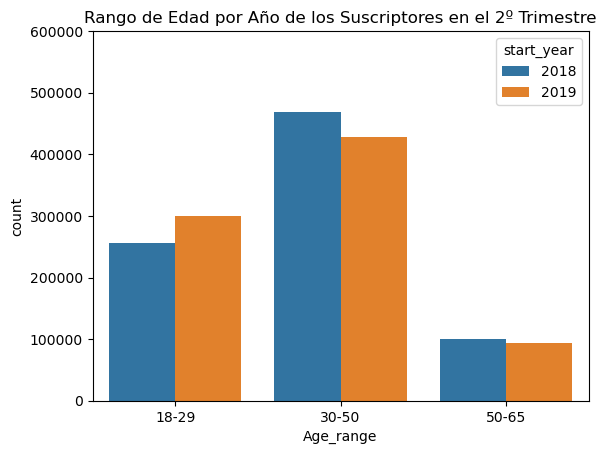

In [31]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='start_year', data=rang_anoS2)

# Configurar el título del gráfico
plt.title('Rango de Edad por Año de los Suscriptores en el 2º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 600000)

# Mostrar el gráfico
plt.show()

Trabajar con la duracion del viaje

In [32]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
trip2 = Q2.groupby(['Age_range', 'start_year'])['tripduration'].mean().reset_index(name='mean_tripduration')
trip2

,Age_range,start_year,mean_tripduration
0,18-29,2018,743.24
1,18-29,2019,734.85
2,30-50,2018,735.80
3,30-50,2019,731.19
4,50-65,2018,712.44
5,50-65,2019,706.80


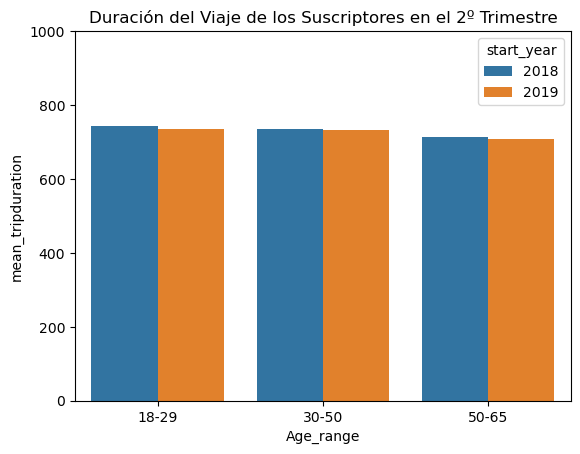

In [33]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='start_year', data=trip2)

# Configurar el título del gráfico
plt.title('Duración del Viaje de los Suscriptores en el 2º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 1000)

# Mostrar el gráfico
plt.show()

Trabajar con el género

In [34]:
# Calcular la suma de cada rango de edad
gend_ano2 = Q2.groupby(['gender','start_year']).size().reset_index(name='count')
gend_ano2

,gender,start_year,count
0,Female,2018,207840
1,Female,2019,204069
2,Male,2018,616334
3,Male,2019,618021


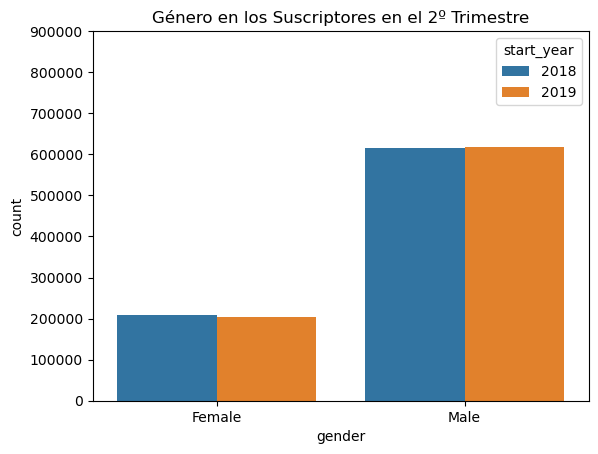

In [35]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='start_year', data=gend_ano2)

# Establecer el título del gráfico
plt.title('Género en los Suscriptores en el 2º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 900000)

# Mostrar el gráfico
plt.show()

Dia de inicio por año y mes

In [36]:
# Calcular la moda de la columna 'star_day' agrupada por 'Start Year' y star_month
moda_por_day2 = Q2.groupby(['start_year','start_month'])['start_day'].apply(lambda x: x.mode()).reset_index(name='dia_frecuente')
moda_por_day2 = moda_por_day2.drop(columns='level_2')
moda_por_day2

,start_year,start_month,dia_frecuente
0,2018,4,30
1,2018,5,31
2,2018,6,13
3,2019,4,8
4,2019,5,23
5,2019,6,26


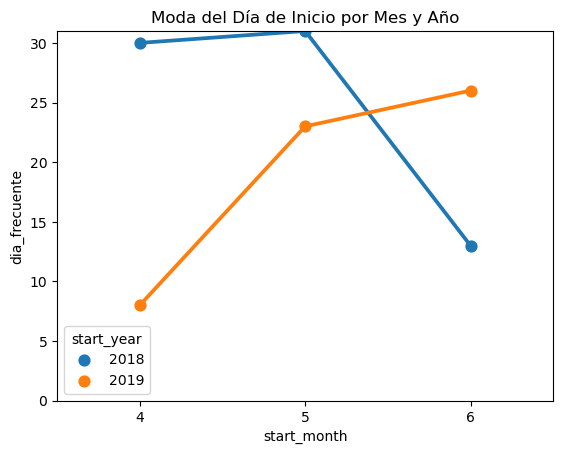

In [37]:
# Crear el gráfico de barras utilizando Seaborn
sns.pointplot(x='start_month', y='dia_frecuente', hue='start_year', data=moda_por_day2)

# Configurar el título del gráfico
plt.title('Moda del Día de Inicio por Mes y Año')

# Establecer el rango del eje y desde 0 hasta 30
plt.ylim(0, 31)

# Mostrar el gráfico
plt.show()

Estaciones mejores y peores de inicio

In [38]:
# Contar las repeticiones de valores en la columna 'from_station_name', para saber las mejores estaciones
mejores_estaciones2 = Q2['from_station_name'].value_counts().head(5)
mejores_estaciones2

Canal St & Adams St             30208
Clinton St & Washington Blvd    25506
Clinton St & Madison St         24471
Franklin St & Monroe St         17793
Daley Center Plaza              17778
Name: from_station_name, dtype: int64

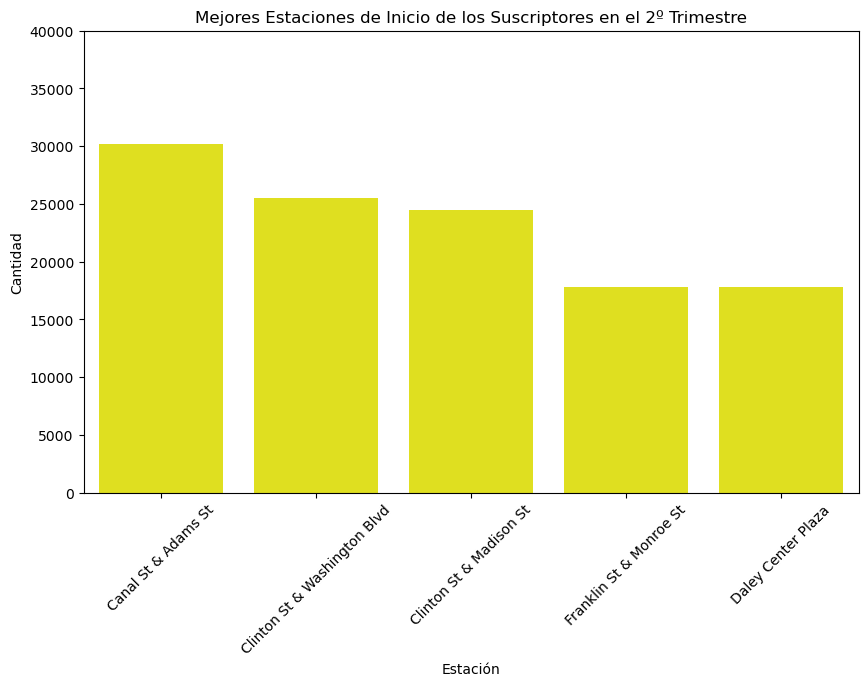

In [39]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones2.index, y=mejores_estaciones2.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Inicio de los Suscriptores en el 2º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [40]:
# Contar las repeticiones de valores en la columna 'to_station_name', para saber las mejores estaciones
mejores_estaciones_final2 = Q2['to_station_name'].value_counts().head(5)
mejores_estaciones_final2

Canal St & Adams St             28846
Clinton St & Madison St         25653
Clinton St & Washington Blvd    24861
Daley Center Plaza              18144
Kingsbury St & Kinzie St        17194
Name: to_station_name, dtype: int64

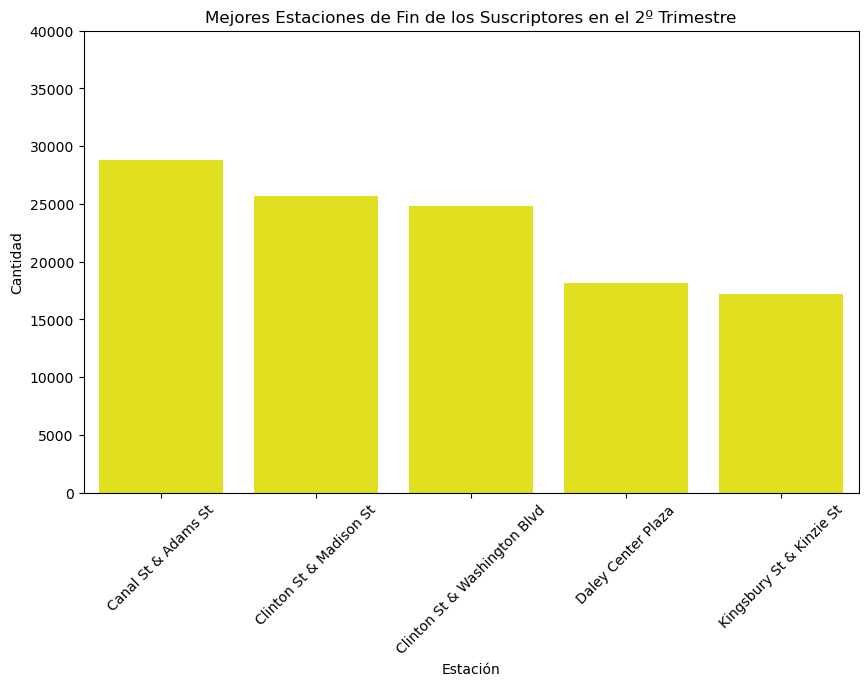

In [41]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones_final2.index, y=mejores_estaciones_final2.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Fin de los Suscriptores en el 2º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

Alrededor de oficinas

RELACIONAR ESTACION DE INICIO Y FINAL.

In [42]:
# Encontrar los viajes que coinciden en inicio y fin de recorrido
viajes_coincidentes2 = Q2[Q2['from_station_name'] == Q2['to_station_name']]
viajes_coincidentes2

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
52,924.00,Racine Ave & 18th St,Racine Ave & 18th St,Subscriber,Male,1,4,2018,18-29
107,1027.00,Field Blvd & South Water St,Field Blvd & South Water St,Subscriber,Male,1,4,2018,50-65
173,150.00,Emerald Ave & 28th St,Emerald Ave & 28th St,Subscriber,Male,1,4,2018,30-50
175,1379.00,Orleans St & Chestnut St (NEXT Apts),Orleans St & Chestnut St (NEXT Apts),Subscriber,Male,1,4,2018,18-29
284,737.00,Morgan St & Polk St,Morgan St & Polk St,Subscriber,Male,1,4,2018,18-29
...,...,...,...,...,...,...,...,...,...
821995,499.00,Blue Island Ave & 18th St,Blue Island Ave & 18th St,Subscriber,Male,30,6,2019,30-50
822020,803.00,Calumet Ave & 18th St,Calumet Ave & 18th St,Subscriber,Male,30,6,2019,30-50
822025,662.00,Green St & Madison St,Green St & Madison St,Subscriber,Male,30,6,2019,18-29
822041,619.00,Western Ave & 21st St,Western Ave & 21st St,Subscriber,Male,30,6,2019,30-50


In [43]:
# Calcular la suma de los recorridos coincidentes por estación
suma_recorridos2 = viajes_coincidentes2['from_station_name'].value_counts().sum()
suma_recorridos2

26061

In [44]:
proporcion_viajes_iguales2 = suma_recorridos2 / len(Q2) * 100 #proporcion de viajes coincidentes
proporcion_viajes_iguales2

1.5830389293576244

SABER CUANTOS DE ESTOS VIAJES QUE COINCIDEN SON DE LAS MEJORES ESTACIONES

In [45]:
#estaciones mejores
estaciones2=['Clinton St & Washington Blvd','Canal St & Adams St','Clinton St & Madison St','Franklin St & Monroe St','Daley Center Plaza']

In [46]:
# Filtrar los viajes coincidentes con las mejores estaciones
viajesft2 = Q2[Q2['from_station_name'].isin(estaciones2) & Q2['to_station_name'].isin(estaciones2) & (Q2['from_station_name'] == Q2['to_station_name'])]
viajesft2

,tripduration,from_station_name,to_station_name,usertype,gender,start_day,start_month,start_year,Age_range
3847,110.00,Franklin St & Monroe St,Franklin St & Monroe St,Subscriber,Male,2,4,2018,30-50
11868,61.00,Canal St & Adams St,Canal St & Adams St,Subscriber,Male,3,4,2018,18-29
22447,526.00,Canal St & Adams St,Canal St & Adams St,Subscriber,Male,5,4,2018,30-50
27867,438.00,Canal St & Adams St,Canal St & Adams St,Subscriber,Male,6,4,2018,30-50
31207,573.00,Clinton St & Madison St,Clinton St & Madison St,Subscriber,Female,8,4,2018,30-50
...,...,...,...,...,...,...,...,...,...
786927,85.00,Daley Center Plaza,Daley Center Plaza,Subscriber,Male,27,6,2019,30-50
796905,181.00,Clinton St & Washington Blvd,Clinton St & Washington Blvd,Subscriber,Female,28,6,2019,18-29
797750,68.00,Canal St & Adams St,Canal St & Adams St,Subscriber,Male,28,6,2019,18-29
802899,969.00,Daley Center Plaza,Daley Center Plaza,Subscriber,Male,28,6,2019,50-65


In [47]:
sum_viajesft2 = viajesft2['from_station_name'].value_counts().sum()
sum_viajesft2

530

In [48]:
# Calcular el porcentaje de viajes coincidentes con las mejores estaciones
porcentaje_coincidentes2 = (sum_viajesft2 / suma_recorridos2) * 100
porcentaje_coincidentes2

2.0336901884041287

# 3º TRIMESTRE 2018 y 2019

In [ ]:
# Cargar los dataset dataset
Q32018 = pd.read_csv('SUSQ318CLEAN.csv')
Q32019 = pd.read_csv('SUSQ319CLEAN.csv')
# Fusionar los datasets por columnas comunes
Q3 = pd.concat([Q32018, Q32019])

In [ ]:
Q3.head()

In [ ]:
Q3.shape

In [ ]:
# Desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
Q3.describe()

Trabajar con la edad

In [ ]:
# Calcular la suma de cada rango de edad
rang_anoS3 = Q3.groupby(['Age_range','start_year']).size().reset_index(name='count')
rang_anoS3

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='start_year', data=rang_anoS3)

# Configurar el título del gráfico
plt.title('Rango de Edad por Año de los Suscriptores en el 3º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 600000)

# Mostrar el gráfico
plt.show()

Trabajar con la duracion del viaje

In [ ]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
trip3 = Q3.groupby(['Age_range', 'start_year'])['tripduration'].mean().reset_index(name='mean_tripduration')
trip3

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='start_year', data=trip3)

# Configurar el título del gráfico
plt.title('Duración del Viaje de los Suscriptores en el 3º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 1000)

# Mostrar el gráfico
plt.show()

Trabajar con el género

In [ ]:
# Calcular la suma de cada rango de edad
gend_ano3 = Q3.groupby(['gender','start_year']).size().reset_index(name='count')
gend_ano3

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='start_year', data=gend_ano3)

# Establecer el título del gráfico
plt.title('Género en los Suscriptores en el 3º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 900000)

# Mostrar el gráfico
plt.show()

Dia de inicio por año y mes

In [ ]:
# Calcular la moda de la columna 'star_day' agrupada por 'Start Year' y star_month
moda_por_day3 = Q3.groupby(['start_year','start_month'])['start_day'].apply(lambda x: x.mode()).reset_index(name='dia_frecuente')
moda_por_day3 = moda_por_day3.drop(columns='level_2')
moda_por_day3

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.pointplot(x='start_month', y='dia_frecuente', hue='start_year', data=moda_por_day3)

# Configurar el título del gráfico
plt.title('Moda del Día de Inicio por Mes y Año')

# Establecer el rango del eje y desde 0 hasta 30
plt.ylim(0, 31)

# Mostrar el gráfico
plt.show()

Estaciones mejores y peores de inicio

In [ ]:
# Contar las repeticiones de valores en la columna 'from_station_name', para saber las mejores estaciones
mejores_estaciones3 = Q3['from_station_name'].value_counts().head(5)
mejores_estaciones3

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones3.index, y=mejores_estaciones3.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Inicio de los Suscriptores en el 3º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [ ]:
# Contar las repeticiones de valores en la columna 'to_station_name', para saber las mejores estaciones
mejores_estaciones_final3 = Q3['to_station_name'].value_counts().head(5)
mejores_estaciones_final3

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones_final3.index, y=mejores_estaciones_final3.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Fin de los Suscriptores en el 3º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

RELACIONAR ESTACION DE INICIO Y FINAL.

In [ ]:
# Encontrar los viajes que coinciden en inicio y fin de recorrido
viajes_coincidentes3 = Q3[Q3['from_station_name'] == Q3['to_station_name']]
viajes_coincidentes3

In [ ]:
# Calcular la suma de los recorridos coincidentes por estación
suma_recorridos3 = viajes_coincidentes3['from_station_name'].value_counts().sum()
suma_recorridos3

In [ ]:
proporcion_viajes_iguales3 = suma_recorridos3 / len(Q3) * 100 #proporcion de viajes coincidentes
proporcion_viajes_iguales3

SABER CUANTOS DE ESTOS VIAJES QUE COINCIDEN SON DE LAS MEJORES ESTACIONES

In [ ]:
#estaciones mejores
estaciones3=['Clinton St & Washington Blvd','Canal St & Adams St','Clinton St & Madison St','Daley Center Plaza ','Kingsbury St & Kinzie St']

In [ ]:
# Filtrar los viajes coincidentes con las mejores estaciones
viajesft3 = Q3[Q3['from_station_name'].isin(estaciones3) & Q3['to_station_name'].isin(estaciones3) & (Q3['from_station_name'] == Q3['to_station_name'])]
viajesft3

In [ ]:
sum_viajesft3 = viajesft3['from_station_name'].value_counts().sum()
sum_viajesft3

In [ ]:
# Calcular el porcentaje de viajes coincidentes con las mejores estaciones
porcentaje_coincidentes3 = (sum_viajesft3 / suma_recorridos3) * 100
porcentaje_coincidentes3

# 4º TRIMESTRE 2018 y 2019

In [ ]:
# Cargar los dataset dataset
Q42018 = pd.read_csv('SUSQ418CLEAN.csv')
Q42019 = pd.read_csv('SUSQ419CLEAN.csv')
# Fusionar los datasets por columnas comunes
Q4 = pd.concat([Q42018, Q42019])

In [ ]:
Q4.head()

In [ ]:
Q4.shape

In [ ]:
# Desactivar la notación científica
pd.set_option('display.float_format', '{:.2f}'.format)
Q4.describe()

Trabajar con la edad

In [ ]:
# Calcular la suma de cada rango de edad
rang_anoS4 = Q4.groupby(['Age_range','start_year']).size().reset_index(name='count')
rang_anoS4

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='count', hue='start_year', data=rang_anoS4)

# Configurar el título del gráfico
plt.title('Rango de Edad por Año de los Suscriptores en el 4º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 600000)

# Mostrar el gráfico
plt.show()

Trabajar con la duracion del viaje

In [ ]:
# Calcular la media de la columna 'tripduration' por rango de edad y año
trip4 = Q4.groupby(['Age_range', 'start_year'])['tripduration'].mean().reset_index(name='mean_tripduration')
trip4

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='Age_range', y='mean_tripduration', hue='start_year', data=trip4)

# Configurar el título del gráfico
plt.title('Duración del Viaje de los Suscriptores en el 4º Trimestre')

# Establecer límites del eje y del gráfico 
plt.ylim(0, 1000)

# Mostrar el gráfico
plt.show()

Trabajar con el género

In [ ]:
# Calcular la suma de cada rango de edad
gend_ano4 = Q4.groupby(['gender','start_year']).size().reset_index(name='count')
gend_ano4

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.barplot(x='gender', y='count', hue='start_year', data=gend_ano4)

# Establecer el título del gráfico
plt.title('Género en los Suscriptores en el 4º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 900000)

# Mostrar el gráfico
plt.show()

Dia de inicio por año y mes

In [ ]:
# Calcular la moda de la columna 'star_day' agrupada por 'Start Year' y star_month
moda_por_day4 = Q4.groupby(['start_year','start_month'])['start_day'].apply(lambda x: x.mode()).reset_index(name='dia_frecuente')
moda_por_day4 = moda_por_day4.drop(columns='level_2')
moda_por_day4

In [ ]:
# Crear el gráfico de barras utilizando Seaborn
sns.pointplot(x='start_month', y='dia_frecuente', hue='start_year', data=moda_por_day4)

# Configurar el título del gráfico
plt.title('Moda del Día de Inicio por Mes y Año')

# Establecer el rango del eje y desde 0 hasta 30
plt.ylim(0, 31)

# Mostrar el gráfico
plt.show()

Estaciones mejores de inicio

In [ ]:
# Contar las repeticiones de valores en la columna 'from_station_name', para saber las mejores estaciones
mejores_estaciones4 = Q4['from_station_name'].value_counts().head(5)
mejores_estaciones4

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones4.index, y=mejores_estaciones4.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Inicio de los Suscriptores en el 4º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [ ]:
# Contar las repeticiones de valores en la columna 'to_station_name', para saber las mejores estaciones
mejores_estaciones_final4 = Q4['to_station_name'].value_counts().head(5)
mejores_estaciones_final4

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=mejores_estaciones_final4.index, y=mejores_estaciones_final4.values, color='yellow')
plt.xlabel('Estación')
plt.ylabel('Cantidad')
plt.title('Mejores Estaciones de Fin de los Suscriptores en el 4º Trimestre')
# Establecer límites del eje y del gráfico 
plt.ylim(0, 40000)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

RELACIONAR ESTACION DE INICIO Y FINAL.

In [ ]:
# Encontrar los viajes que coinciden en inicio y fin de recorrido
viajes_coincidentes4 = Q4[Q4['from_station_name'] == Q4['to_station_name']]
viajes_coincidentes4

In [ ]:
# Calcular la suma de los recorridos coincidentes por estación
suma_recorridos4 = viajes_coincidentes['from_station_name'].value_counts().sum()
suma_recorridos4

In [ ]:
proporcion_viajes_iguales4 = suma_recorridos4 / len(Q4) * 100 #proporcion de viajes coincidentes
proporcion_viajes_iguales4

SABER CUANTOS DE ESTOS VIAJES QUE COINCIDEN SON DE LAS MEJORES ESTACIONES

In [ ]:
#estaciones mejores
estaciones4=['Clinton St & Washington Blvd','Canal St & Adams St','Clinton St & Madison St','Columbus Dr & Randolph St ','Kingsbury St & Kinzie St']

In [ ]:
# Filtrar los viajes coincidentes con las mejores estaciones
viajesft4 = Q4[Q4['from_station_name'].isin(estaciones4) & Q4['to_station_name'].isin(estaciones4) & (Q4['from_station_name'] == Q4['to_station_name'])]
viajesft4

In [ ]:
sum_viajesft4 = viajesft4['from_station_name'].value_counts().sum()
sum_viajesft4

In [ ]:
# Calcular el porcentaje de viajes coincidentes con las mejores estaciones
porcentaje_coincidentes4 = (sum_viajesft4 / suma_recorridos4) * 100
porcentaje_coincidentes4

# CONCLUSIONES SUSCRIPTORES